In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

## Ice Cream Production Data of USA

In [3]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [4]:
df_ice_cream

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [5]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [6]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [8]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [9]:
#show result
df_ice_cream

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


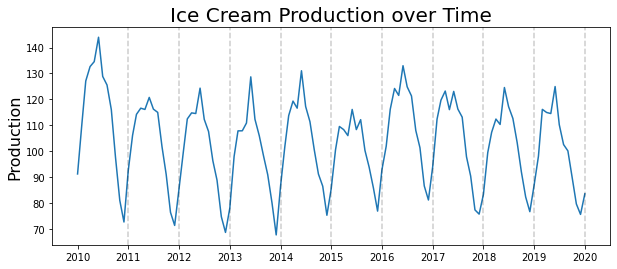

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### ACF

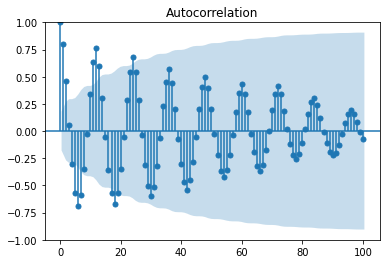

In [11]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

### PACF

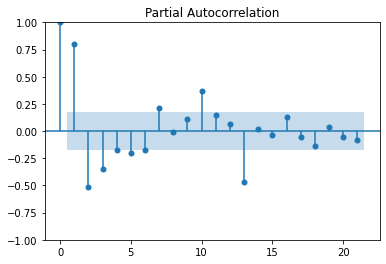

In [12]:
pacf_plot = plot_pacf(df_ice_cream.production, method='ywm')

## Stock data

In [13]:
import yfinance as yf

In [14]:
#define the ticker symbol
tickerSymbol = 'AAPL'

In [15]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [27]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2021-1-1', end='2023-11-1')

In [28]:
tickerDf = tickerDf[['Close']]

In [29]:
#see your data
tickerDf

,Close
Date,
2020-12-31,130.387222
2021-01-04,127.164154
2021-01-05,128.736389
2021-01-06,124.402924
2021-01-07,128.647980
...,...
2023-10-25,170.874893
2023-10-26,166.670425
2023-10-27,167.998672


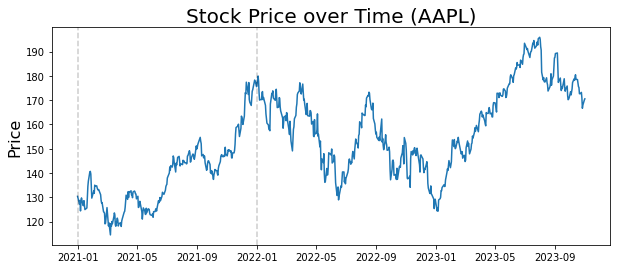

In [30]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2021,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [31]:
perform_adf_test(tickerDf.Close)

ADF Statistic: -1.960621
p-value: 0.304102


### Stationarity: take first difference of this series

In [32]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [33]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [34]:
tickerDf.head()

,Close,FirstDifference
Date,,
2020-12-31,130.387222,-3.223068
2021-01-04,127.164154,1.572235
2021-01-05,128.736389,-4.333466
2021-01-06,124.402924,4.245056
2021-01-07,128.647980,1.110367


In [35]:
perform_adf_test(tickerDf['FirstDifference'])

ADF Statistic: -19.976956
p-value: 0.000000


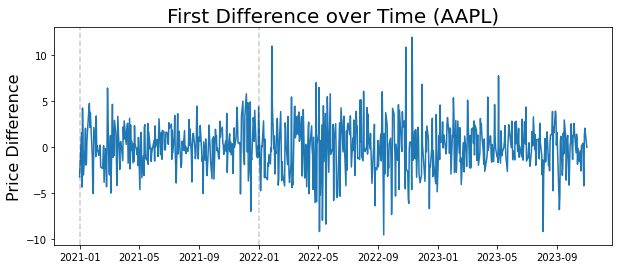

In [36]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2021,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### ACF

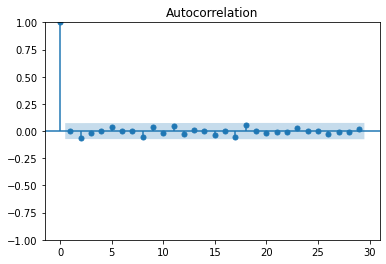

In [37]:
acf_plot = plot_acf(tickerDf.FirstDifference)

### PACF

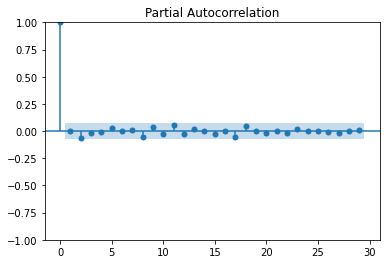

In [38]:
pacf_plot = plot_pacf(tickerDf.FirstDifference, method='ywm')